# **Rice 🍚**

## Questions
- What is the best feature to differentiate between ``jasmine`` and ``baldo`` rice?
- Are `length` and `roundness` the key features to differentiate them?


<img src="./img/jasmine_rice.png" alt="jasmine rice" height="400">
<img src="./img/gonen_rice.png" alt="gohnen rice" height="400">

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./dataset/Rice-Gonen andJasmine.csv")

data = data.drop(columns=["id"]).dropna()
data.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
5,2990,77.417073,50.954344,0.752861,3080,61.700780,0.584898,216.930,0.798439,1.519342,jasmine
6,3556,84.323564,55.413061,0.753762,3636,67.287739,0.750211,227.007,0.867148,1.521727,jasmine
7,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487,jasmine
8,2629,74.133114,48.074144,0.761228,2790,57.856260,0.640595,207.325,0.768594,1.542058,jasmine
9,5719,106.721142,68.977700,0.763053,5819,85.332625,0.754983,281.839,0.904748,1.547183,jasmine


## Explaination
### Axis Length and Aspect Ratio
<img src="./img/axes.png" height=200>
<br>
<code>aspect_ratio = major_axis / minor_axis</code>

### Eccentricity
<img src="./img/eccentricity.png" height=200>
<br>
<div><strong>0...perfect Circle</strong></div>
<div><strong>1...perfect Line</strong></div>

### Roundness
<code>roundness = 4 * PI * area / perimeter²</code>

### Extent
<img src="./img/extent.png" height=200>
<br>
<code>extend = area / bounding_box_area</code>

### (Convex) Area
<img src="./img/convex.png" height=200>


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


In [3]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845


In [4]:
data["Class"].value_counts()

Class
jasmine    9985
Gonen      8200
Name: count, dtype: int64

## What can we see?
### Problems
- no units of measurements
- a lot of features
- maybe strong correlations?

In [5]:
rice_palette = sns.xkcd_palette(["hot pink", "azure"])
rice_palette

[(1.0, 0.00784313725490196, 0.5529411764705883),
 (0.023529411764705882, 0.6039215686274509, 0.9529411764705882)]

## BoxPlots first look

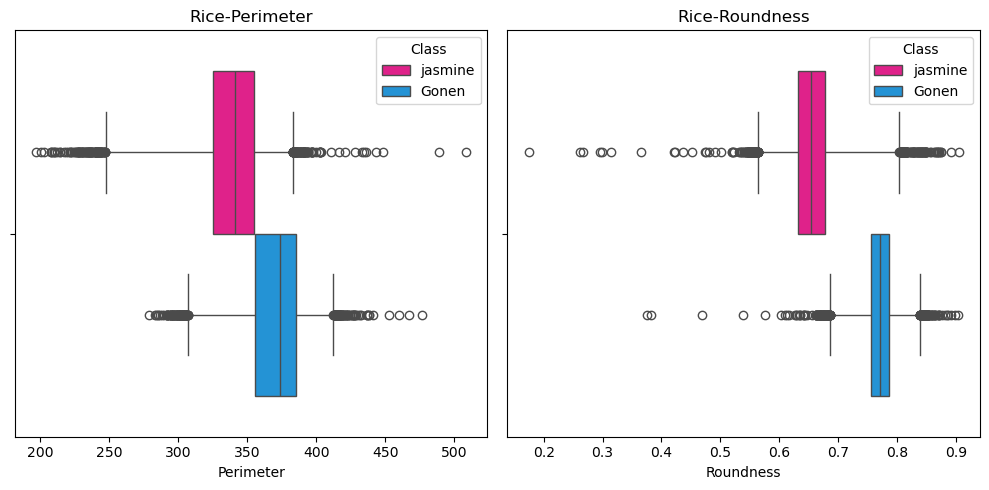

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes = axes.flatten()

sns.boxplot(
    data=data,
    hue="Class",
    palette=rice_palette,
    x='Perimeter',
    whis=[1,99],
    ax=axes[0],
)
axes[0].set_title('Rice-Perimeter')

sns.boxplot(
    data=data,
    hue="Class",
    palette=rice_palette,
    x='Roundness',
    whis=[1,99],
    ax=axes[1],
)
axes[1].set_title('Rice-Roundness')

plt.tight_layout()
plt.show()

## Quick Thought Stop
- Are they correlated?
- Any other potential correlations?

## Correlation

<Axes: >

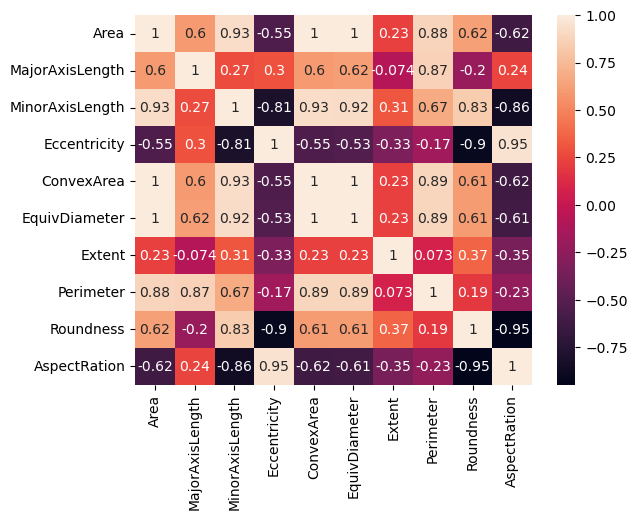

In [7]:
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)

In [8]:
import pandas as pd

corr_matrix = data.corr(numeric_only=True).abs()  
high_corr = corr_matrix[corr_matrix > 0.85] 

high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature 1", "Feature 2", "Correlation"]

high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] > 0.85]

print(high_corr_pairs.sort_values(by="Correlation"))


          Feature 1        Feature 2  Correlation
23  MinorAxisLength     AspectRation     0.860516
14  MajorAxisLength        Perimeter     0.870178
6              Area        Perimeter     0.881540
32       ConvexArea        Perimeter     0.886987
36    EquivDiameter        Perimeter     0.891567
28     Eccentricity        Roundness     0.903657
19  MinorAxisLength    EquivDiameter     0.923790
18  MinorAxisLength       ConvexArea     0.928992
1              Area  MinorAxisLength     0.930215
44        Roundness     AspectRation     0.947875
29     Eccentricity     AspectRation     0.950301
30       ConvexArea    EquivDiameter     0.997403
4              Area    EquivDiameter     0.998158
3              Area       ConvexArea     0.999362


## Highly correlated values
For each of the highly correlated feature pairs, one gets dropped, for easier understandability of future diagrams

In [9]:
cleaned_data = data.drop(columns=["ConvexArea", "EquivDiameter", "AspectRation"])

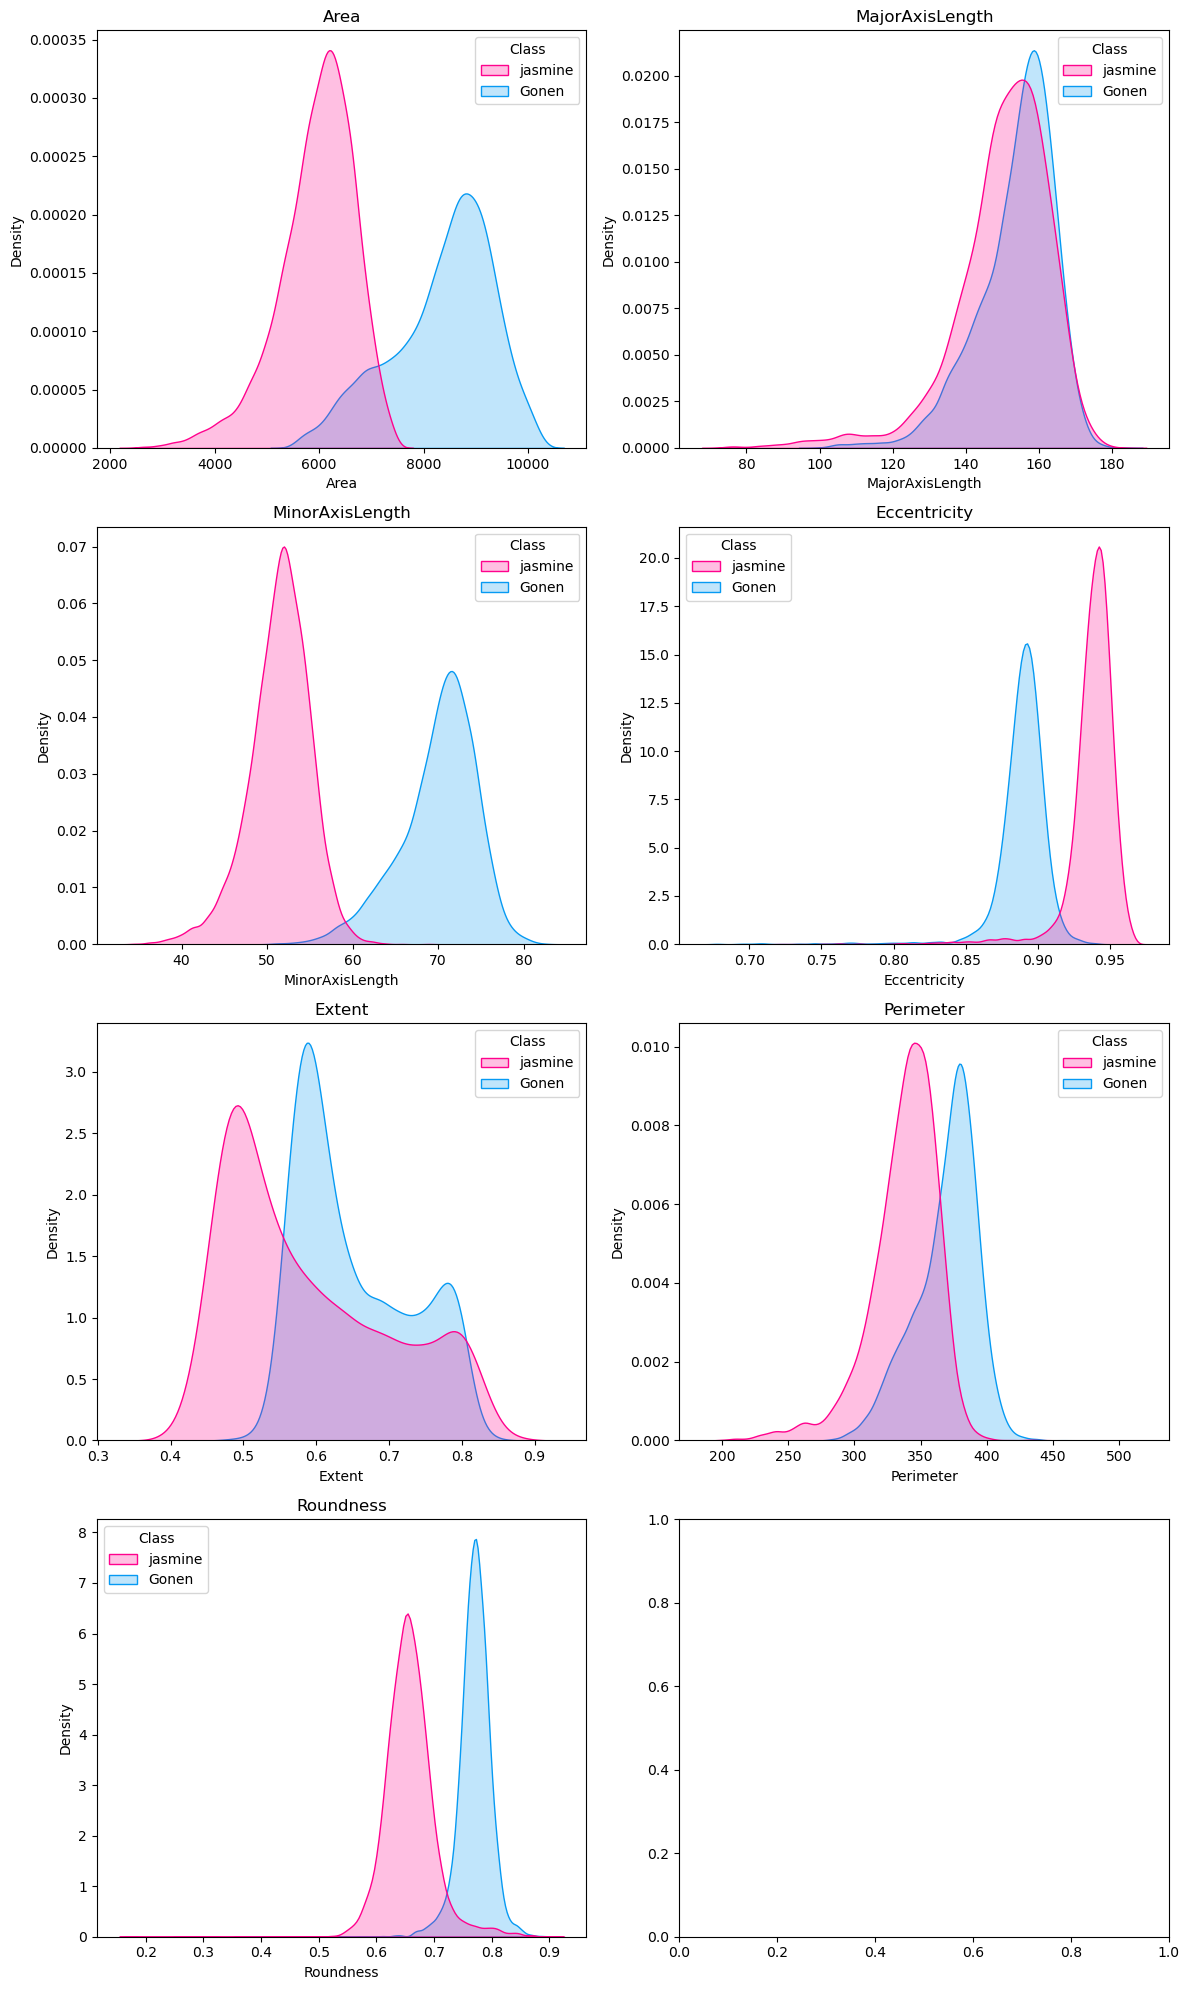

In [10]:
cols = [
    "Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity",
    "Extent", "Perimeter", "Roundness"
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i, column in enumerate(cols):
    sns.kdeplot(
        data=cleaned_data,
        hue="Class",
        palette=rice_palette,
        x=column,
        ax=axes[i],
        fill=True
    )
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


## Key-Features
- Roundness
- Eccentricity
- Minor-Axis-Length

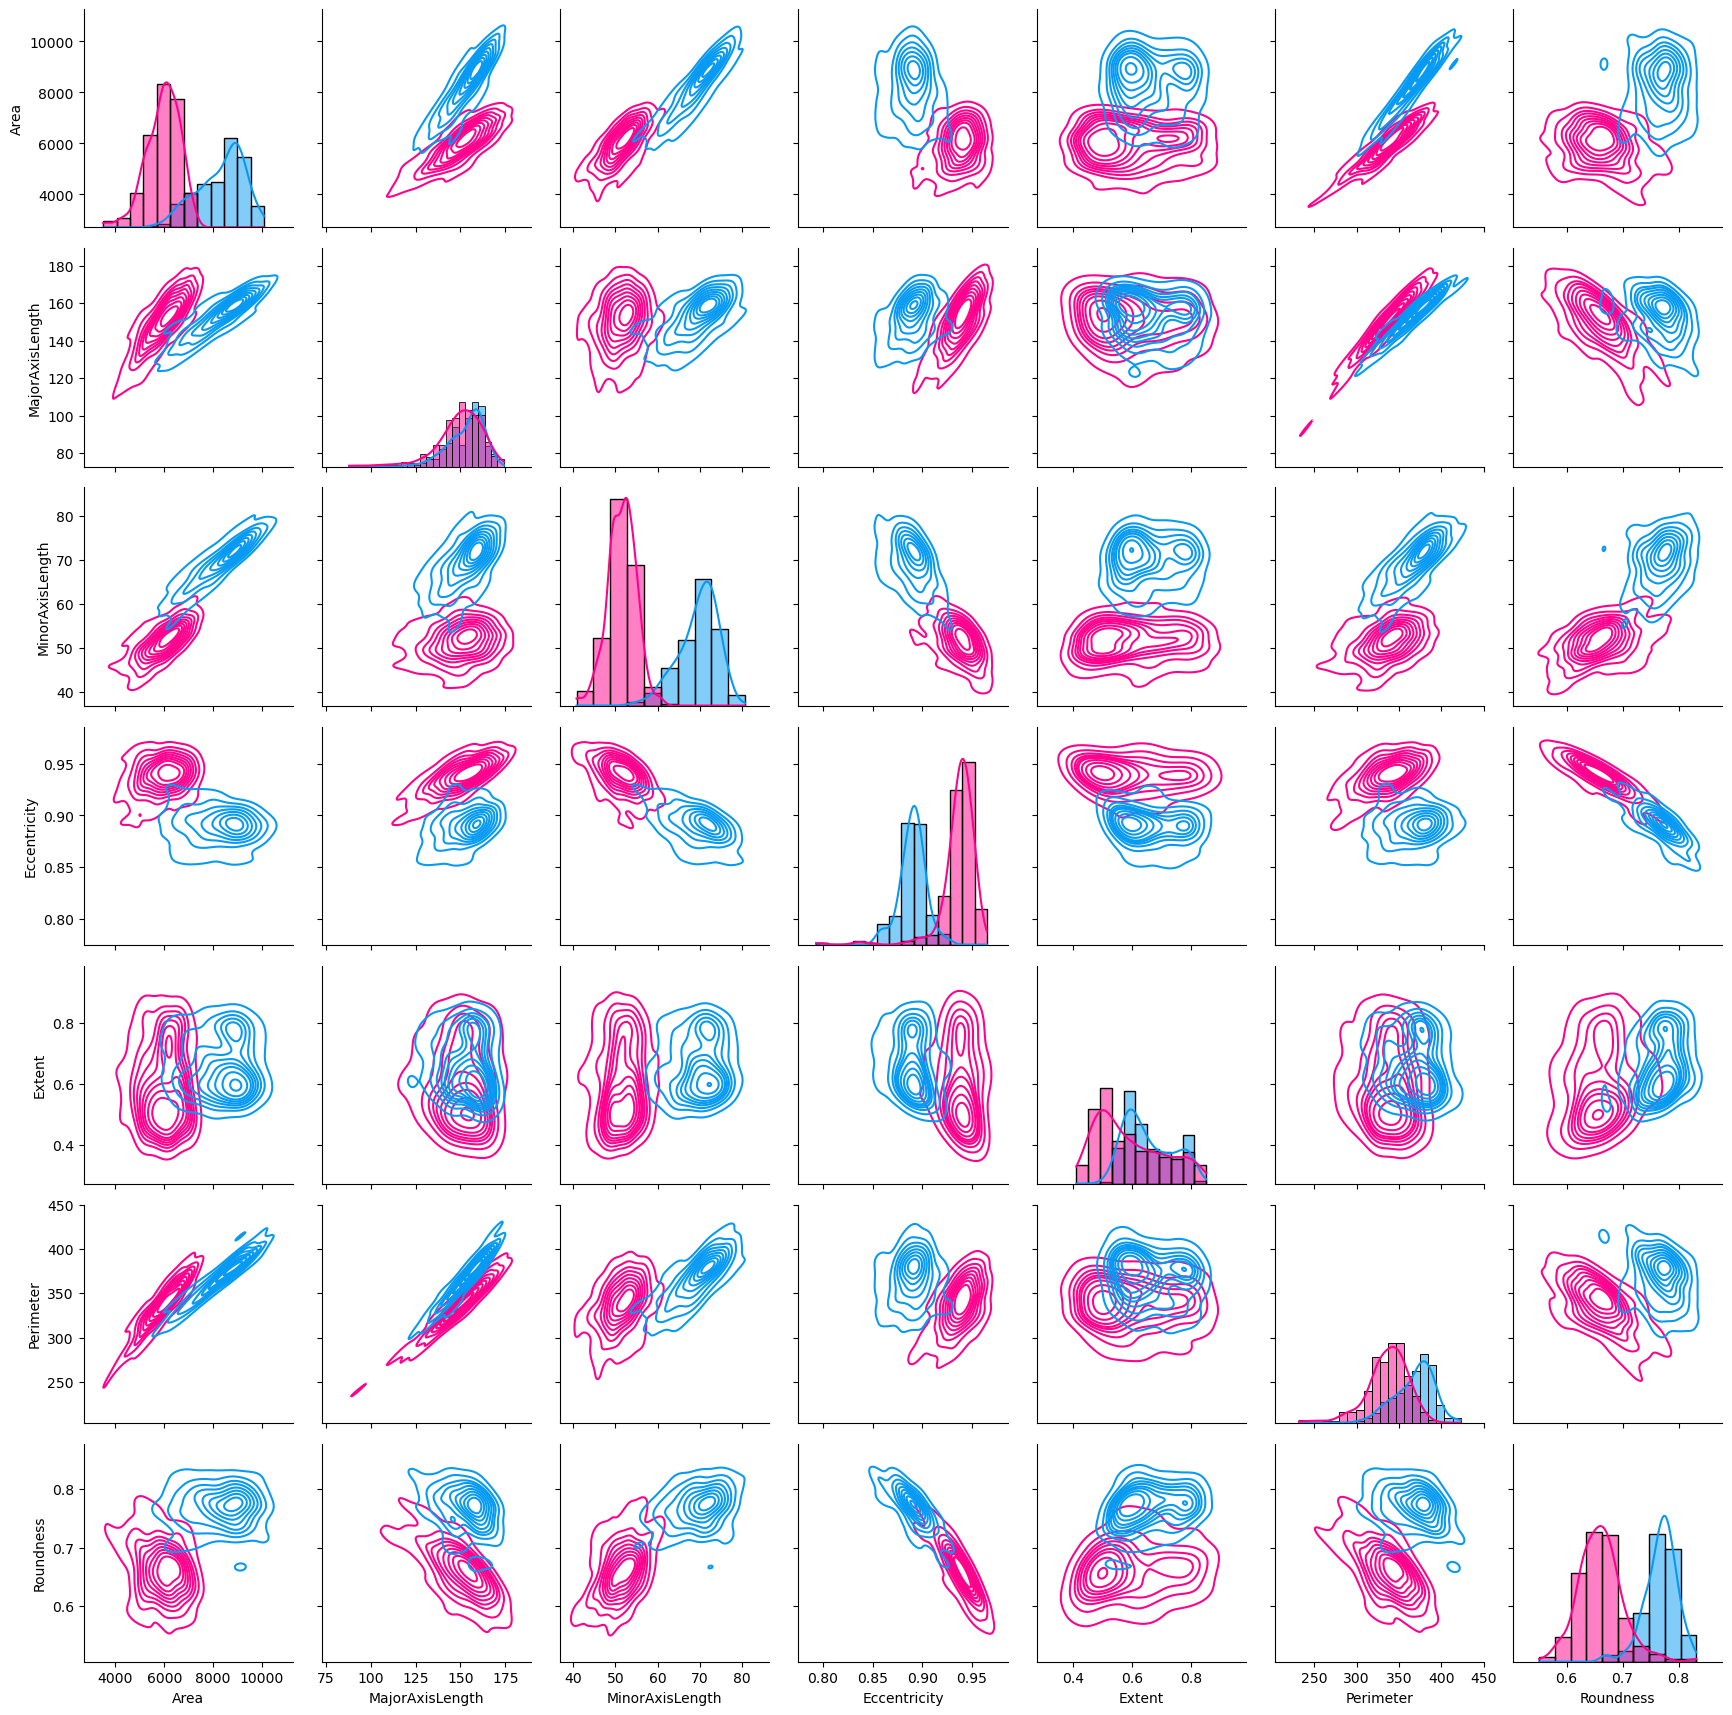

In [11]:
pair_grid = sns.PairGrid(data=cleaned_data.sample(500), hue='Class', palette=rice_palette)
pair_grid.map_diag(sns.histplot, kde=True)
pair_grid.map_offdiag(sns.kdeplot)

## Back to the questions
- What is the best feature to differentiate between ``jasmine`` and ``baldo`` rice?
  - the key feature is the `minor-axis-length`
- Are `length` and `roundness` the key features to differentiate them?
    - `roundness` and `minor-axis-length` are decent
    - but `area` and `roundness` would also work